In [14]:
!pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
def normalize(df):
    for column in df:
        df = df.replace({f'{column}': {"Female": 1, "Male": 0, "No Info": 0, "never": 1, "former": 2, "current": 3, "not current": 4}})
    df = df[~df.apply(lambda row: any(row == ''), axis=1)]
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.astype(float)
    df = df.dropna()
    y = df.pop(df.columns[-1])
    X = df
    return X, y

In [5]:
X, y = normalize(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [16]:
CLASSIFIERS = {
    SVC(): 'Support Vector Machine', 
    KNeighborsClassifier(): 'K-Nearest Neighbors', 
    DecisionTreeClassifier(): 'Decision Tree', 
    RandomForestClassifier(): 'Random Forest', 
    MultinomialNB(): 'Naive Bayes'
}

In [17]:
def evaluate_classifier(clf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test) -> float:
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    prec = precision_score(y_true=y_test, y_pred=y_pred, zero_division=0)
    rec = recall_score(y_true=y_test, y_pred=y_pred, zero_division=0)
    return acc, prec, rec

In [18]:
def train() -> list:
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'])
    for index, clf in enumerate(CLASSIFIERS.keys()):
        acc, prec, rec = evaluate_classifier(clf)
        row = [CLASSIFIERS[clf], acc, prec, rec]
        results.loc[index] = row
    return results

In [19]:
def run():
    results = train()
    results = results.set_index('Model')
    results.to_csv('results.csv', index=True)
    ax = results.plot(kind='bar')
    ax.set_xlabel('Models', ha='center', fontsize=10)
    ax.set_ylabel('Values')
    ax.set_title('Performance Metrics')
    plt.legend(loc='upper right', fontsize='small')
    plt.xticks(rotation=0, fontsize=5)
    plt.savefig('results.png', format='png')

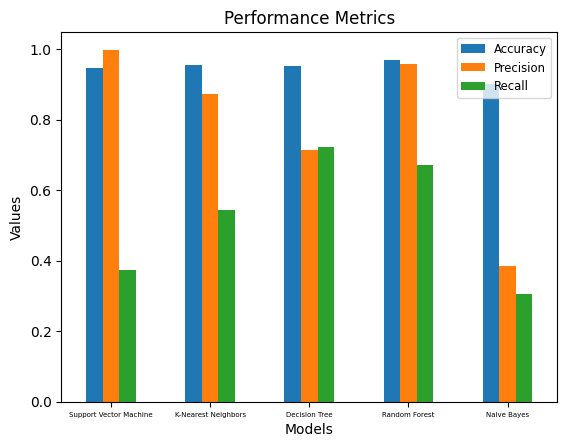

In [20]:
run()

In [22]:
random = RandomForestClassifier()
model = random.fit(X_train, y_train)
joblib.dump(model, 'model.pkl')

['model.pkl']